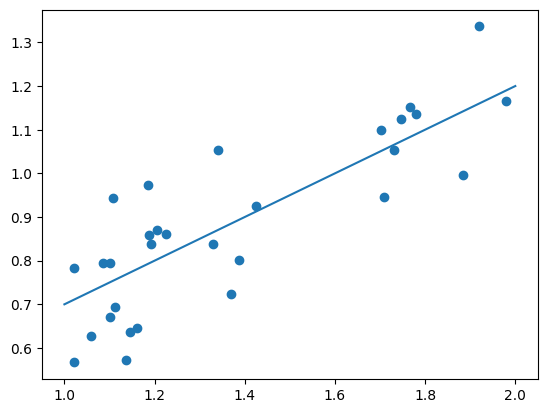

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sequential import Linear, MSELoss, Sequential

model = Sequential([Linear(1, 1)], MSELoss())

def eqn(x):
    return 0.5 * x + 0.2

X = []
y = []

for i in range(30):
    rand = np.random.uniform(1, 2)
    offset = np.random.uniform(-0.4, 0.4)
    outp = eqn(rand + offset)

    X.append(rand)
    y.append(outp)

X = np.array(X).reshape(-1,1)
y = np.array(y)

plt.scatter(X, y)
x_val = np.linspace(1, 2, 100)
plt.plot(x_val, np.apply_along_axis(eqn, 0, x_val))



In [2]:
num_epochs = 1500

for i in range(num_epochs):
    for j in range(20):
        n = np.random.randint(0, X.shape[0])
        predictions = model.forward(X[n:n+1])
        loss = model.loss.forward(y[n:n+1], predictions)
        delta = model.loss.backward()
        model.backward(delta)
        model.sgd_step(0.005)
    if (num_epochs % 10 == 0):
            print(f'loss: {loss}')
    
    

loss: [0.18244593]
loss: [0.02588802]
loss: [0.07451976]
loss: [0.09263658]
loss: [9.28246127e-05]
loss: [0.06715052]
loss: [0.01904704]
loss: [0.00141341]
loss: [0.02349465]
loss: [0.00983225]
loss: [0.01777078]
loss: [0.00386248]
loss: [0.05860526]
loss: [0.0087607]
loss: [0.00156751]
loss: [0.04139439]
loss: [0.06260772]
loss: [0.00133567]
loss: [2.73847553e-05]
loss: [3.20871559e-05]
loss: [0.06478635]
loss: [0.00239635]
loss: [0.0249783]
loss: [8.7554998e-05]
loss: [1.94279692e-05]
loss: [0.00731193]
loss: [0.0263593]
loss: [0.00026422]
loss: [0.00934851]
loss: [0.00859509]
loss: [0.00682876]
loss: [0.01045164]
loss: [0.01834177]
loss: [0.0598109]
loss: [0.01973573]
loss: [0.00377623]
loss: [0.00950359]
loss: [0.00327757]
loss: [0.02176208]
loss: [0.05437427]
loss: [0.06009469]
loss: [0.03062314]
loss: [0.02823228]
loss: [0.04892459]
loss: [0.0157448]
loss: [0.00363393]
loss: [0.01973681]
loss: [0.00136767]
loss: [0.0231644]
loss: [0.00977249]
loss: [0.01944646]
loss: [0.0310205]


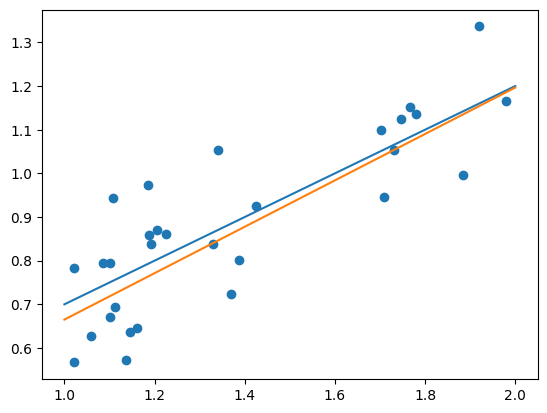

In [3]:
plt.scatter(X, y)
x_val = np.linspace(1, 2, 100)
plt.plot(x_val, np.apply_along_axis(eqn, 0, x_val))

y_pred = model.forward(x_val.reshape(1, -1))
plt.plot(x_val, y_pred[0])